## STP戦略
</br>
キーワードに付随した,競合を知る</br>
欲：メタ情報から共通項を知る</br>
欲：データフレーム→CSVの掃き出しでもいいかも

In [3]:
#analyticsライブラリ
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import torch
from matplotlib import rcParams

#Google連携ライブラリ
import google.oauth2.credentials
import google_auth_oauthlib.flow
from apiclient.errors import HttpError
from googleapiclient.http import MediaIoBaseDownload
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build

In [4]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

## データフレーム加工

### １．アナリティクスデータ(ALL)

In [5]:
folder = '動画 2013-03-01_2022-03-01 kohizeri329'

In [6]:
analytics_all = pd.read_csv(f'csv/analytics_reports/{folder}/陦ｨ繝・・繧ｿ.csv')

In [7]:
analytics_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   動画                  34 non-null     object 
 1   動画のタイトル             33 non-null     object 
 2   動画公開時刻              32 non-null     object 
 3   高評価数                34 non-null     int64  
 4   視聴回数                34 non-null     int64  
 5   総再生時間（時間）           34 non-null     float64
 6   チャンネル登録者            34 non-null     int64  
 7   インプレッション数           34 non-null     int64  
 8   インプレッションのクリック率 (%)  34 non-null     float64
dtypes: float64(2), int64(4), object(3)
memory usage: 2.5+ KB


In [8]:
analytics_all.isna().sum()

動画                    0
動画のタイトル               1
動画公開時刻                2
高評価数                  0
視聴回数                  0
総再生時間（時間）             0
チャンネル登録者              0
インプレッション数             0
インプレッションのクリック率 (%)    0
dtype: int64

In [9]:
#analytics_all.drop(index=0)
analytics_all.head(3)

,動画,動画のタイトル,動画公開時刻,高評価数,視聴回数,総再生時間（時間）,チャンネル登録者,インプレッション数,インプレッションのクリック率 (%)
0,合計,NaN,NaN,2698,197345,2276.5310,740,1012845,6.91
1,4KWc-UfccMg,ヴァンパイア / DECO*27 弾き語りcover【男性 アコギ ボカロ】,"May 9, 2021",244,22571,121.4657,131,22269,8.77
2,Ry-TSO8GXHk,マトリョシカ / ハチ 弾き語りcover【男性 アコギ ボカロ】,"May 29, 2021",242,12163,89.1632,66,26921,7.31


<AxesSubplot:>

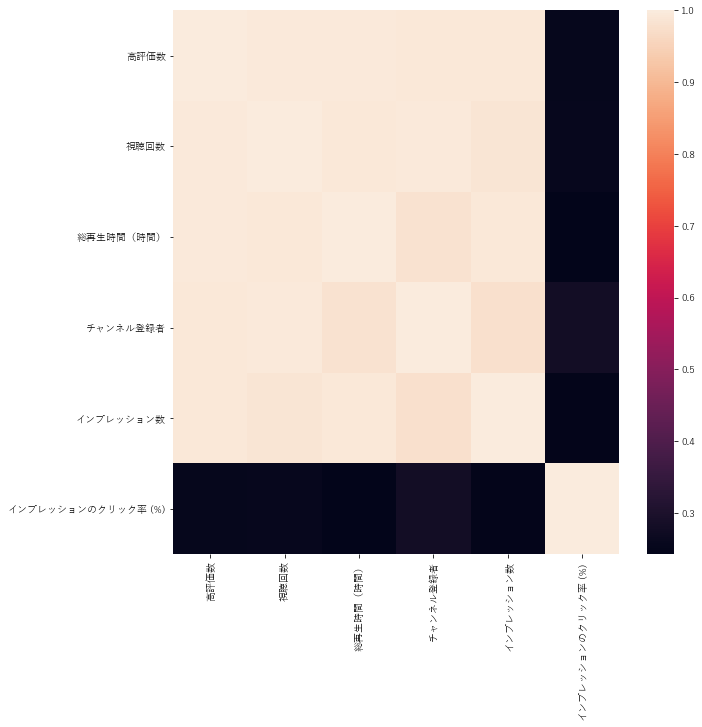

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(analytics_all.corr(), ax=ax)

In [16]:
analytics_all['評価比率'] = analytics_all['高評価数'] / analytics_all['視聴回数']

In [19]:
analytics_all[analytics_all['視聴回数'] >= 500].sort_values('評価比率', ascending=False)

,動画,動画のタイトル,動画公開時刻,高評価数,視聴回数,総再生時間（時間）,チャンネル登録者,インプレッション数,インプレッションのクリック率 (%),評価比率
13,23ua7DIjnA8,ラプンツェル / n-buna (30秒弾き語りcover)【男性 アコギ ボカロ】#Shorts,"Feb 18, 2022",39,1049,5.0982,1,1886,2.01,0.037178
17,ld27B5e02Xo,天ノ弱 / 164 (30秒弾き語りcover)【男性 アコギ ボカロ】#Shorts,"Jan 28, 2022",23,791,4.1658,1,2414,2.32,0.029077
16,S7xPvezEfLQ,Tell Your World / kz-livetune (30秒弾き語りcover)【男...,"Feb 21, 2022",27,935,5.8846,1,2560,1.13,0.028877
19,2cxlaxoPxFM,少女レイ /みきとP (30秒弾き語りcover)【男性 アコギ ボカロ】#Shorts,"Feb 9, 2022",17,589,4.6876,0,2376,1.98,0.028862
15,RFPtgmbiFmA,心拍数♯0822 / 蝶々P (30秒弾き語りcover)【男性 アコギ ボカロ】#Shorts,"Feb 25, 2022",27,1086,3.4635,1,2575,0.62,0.024862
7,Nga5eXZFwH0,恋愛裁判 / 40mP【ボカロ アコギ 弾き語り】,"May 17, 2017",113,4690,62.2403,18,56550,6.00,0.024094
5,_PUVRLIjWWc,天ノ弱 / 164 (cover)【男性 アコギ ボカロ】,"May 31, 2020",138,6153,122.0476,26,59963,8.20,0.022428
2,Ry-TSO8GXHk,マトリョシカ / ハチ 弾き語りcover【男性 アコギ ボカロ】,"May 29, 2021",242,12163,89.1632,66,26921,7.31,0.019896
20,m2PPH30X8bw,フォニイ / ツミキ (30秒弾き語りcover)【男性 アコギ ボカロ】#Shorts,"Jan 26, 2022",17,858,4.4679,2,3098,2.36,0.019814
11,niKHM4bnnLg,【耳ｺﾋﾟコード付】 太陽系デスコ / ナユタン星人 【 ボカロ ギター 弾き語りcover 】,"Feb 7, 2018",56,2913,41.0008,13,31258,6.37,0.019224


In [18]:
analytics_all.sort_values('インプレッションのクリック率 (%)', ascending=False)

,動画,動画のタイトル,動画公開時刻,高評価数,視聴回数,総再生時間（時間）,チャンネル登録者,インプレッション数,インプレッションのクリック率 (%),評価比率
3,91hX6mqJbzk,KING / Kanaria 弾き語りcover【男性 アコギ ボカロ】,"Oct 3, 2020",159,11474,112.5128,35,82807,11.90,0.013857
1,4KWc-UfccMg,ヴァンパイア / DECO*27 弾き語りcover【男性 アコギ ボカロ】,"May 9, 2021",244,22571,121.4657,131,22269,8.77,0.010810
10,YbvcUa5ESu4,ハイドアンド・シーク / 19's Sound Factory【ボカロ アコギ 弾き語り】,"Jun 1, 2017",70,5165,66.8324,14,39504,8.63,0.013553
5,_PUVRLIjWWc,天ノ弱 / 164 (cover)【男性 アコギ ボカロ】,"May 31, 2020",138,6153,122.0476,26,59963,8.20,0.022428
8,zGI5x5zvoiU,エンヴィーベイビー / Kanaria 弾き語りcover【男性 アコギ ボカロ】,"May 1, 2021",85,16318,88.3418,67,16679,7.40,0.005209
2,Ry-TSO8GXHk,マトリョシカ / ハチ 弾き語りcover【男性 アコギ ボカロ】,"May 29, 2021",242,12163,89.1632,66,26921,7.31,0.019896
0,合計,NaN,NaN,2698,197345,2276.5310,740,1012845,6.91,0.013671
12,g9mti16w0Vk,フィクサー / ぬゆり 弾き語りcover【男性 アコギ ボカロ】,"Dec 6, 2020",46,2577,29.5958,17,30929,6.59,0.017850
11,niKHM4bnnLg,【耳ｺﾋﾟコード付】 太陽系デスコ / ナユタン星人 【 ボカロ ギター 弾き語りcover 】,"Feb 7, 2018",56,2913,41.0008,13,31258,6.37,0.019224
7,Nga5eXZFwH0,恋愛裁判 / 40mP【ボカロ アコギ 弾き語り】,"May 17, 2017",113,4690,62.2403,18,56550,6.00,0.024094
